In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [2]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images


In [3]:

# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")


Number of folders (including subfolders): 6
Number of images: 3000


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 
output_dir = '/kaggle/working/split_dataset' 
train_ratio = 0.8  

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: /kaggle/working/split_dataset/train
Test directory: /kaggle/working/split_dataset/test


Random Train Images:
Showing random images from category: sea


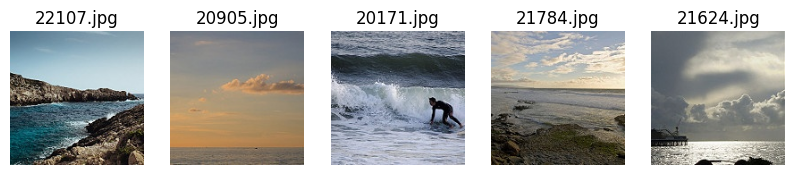

Random Test Images:
Showing random images from category: glacier


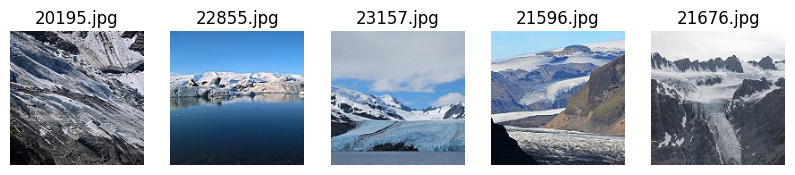

In [5]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory = "/kaggle/input/intel-image-dataset/Intel Image Dataset" 

def show_random_images(directory, num_images=5):
    """
    Display random images from a directory.
    
    Args:
        directory (str): Path to the directory containing category subfolders.
        num_images (int): Number of random images to display.
    """
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('/kaggle/working/split_dataset/train')

print("Random Test Images:")
show_random_images('/kaggle/working/split_dataset/test')


In [6]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
import seaborn as sns

In [8]:
from tensorflow.keras.applications import VGG16
# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
num_classes = 6  
model = define_model(num_classes)

# Summary of the model
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


ValueError: Undefined shapes are not supported.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



def plot_pr_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [11]:

# Define the model using VGG16
def define_model(num_classes, dropout_rate=0.5):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head with Dropout
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))  # Add Dropout after the dense layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [12]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = '/kaggle/working/split_dataset/train'
    test_dir = '/kaggle/working/split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model with a dropout rate
    num_classes = len(train_it.class_indices)  # Number of classes

    # Get the VGG16 base model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Identify the layers in Block 3
    block3_layers = [
        layer for layer in base_model.layers
        if layer.name.startswith('block3')
    ]

    # Loop through different dropout rates from 0.1 to 0.7
    for dropout_rate in np.arange(0.1, 0.8, 0.1):
        print(f"Testing with Dropout rate: {dropout_rate}")

        # Define the model for each dropout rate
        model = define_model(num_classes, dropout_rate=dropout_rate)
        
        # Training loop: progressively unfreeze layers within Block 3
        for i in range(len(block3_layers)):
            # Freeze all layers initially
            for layer in base_model.layers:
                layer.trainable = False

            # Unfreeze layers within Block 3 up to the current layer
            for j in range(i + 1):
                block3_layers[j].trainable = True

            # Recompile the model after unfreezing layers
            model.compile(optimizer=Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            print(f"Training with Block 3 layers up to {block3_layers[i].name} unfrozen...")
            history = model.fit(
                train_it,
                validation_data=test_it,
                epochs=50
            )

            # Plot accuracy and loss curves for comparison
            plot_curves(history)

            # Evaluate model on test data
            test_steps = len(test_it)
            y_probs = model.predict(test_it, steps=test_steps, verbose=1)
            y_pred = np.argmax(y_probs, axis=1)
            y_true = test_it.classes

            # Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            print("Confusion Matrix:\n", cm)

            # Plot Confusion Matrix
            class_names = list(test_it.class_indices.keys())
            plot_confusion_matrix(cm, class_names)

            # Classification Report
            report = classification_report(y_true, y_pred, target_names=class_names)
            print("Classification Report:\n", report)

            # One-hot encode y_true
            y_true_one_hot = np.zeros((len(y_true), num_classes))
            y_true_one_hot[np.arange(len(y_true)), y_true] = 1

            # Precision-Recall Curves
            plot_pr_curve(y_true_one_hot, y_probs, num_classes)

            # Save Confusion Matrix to CSV
            cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
            cm_df.to_csv(f'confusion_matrix_block3_layer_{block3_layers[i].name}_dropout_{dropout_rate}.csv', index=True)

            # Save classification report
            report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
            report_df = pd.DataFrame(report_dict).transpose()
            report_df.to_csv(f'classification_report_block3_layer_{block3_layers[i].name}_dropout_{dropout_rate}.csv', index=True)

    print("Model training and evaluation with Dropout complete.")



Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Testing with Dropout rate: 0.1
Training with Block 3 layers up to block3_conv1 unfrozen...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 484ms/step - accuracy: 0.5612 - loss: 1.1525 - val_accuracy: 0.8256 - val_loss: 0.4892
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8720 - loss: 0.3804 - val_accuracy: 0.8588 - val_loss: 0.4119
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9222 - loss: 0.2751 - val_accuracy: 0.8439 - val_loss: 0.3970
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9491 - loss: 0.2006 - val_accuracy: 0.8405 - val_loss: 0.4234
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.9443 - loss: 0.1648 - val_accuracy: 0.8472 - val_loss: 0.3948
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.9637 - loss: 0.1422 - val_accuracy: 0.8522 - val_loss: 0.3897
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.9826 - loss: 0.1077 - val_accuracy: 0.8571 - val_loss: 0.3852
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9821 - loss: 0.0842 - val_accuracy: 0.862

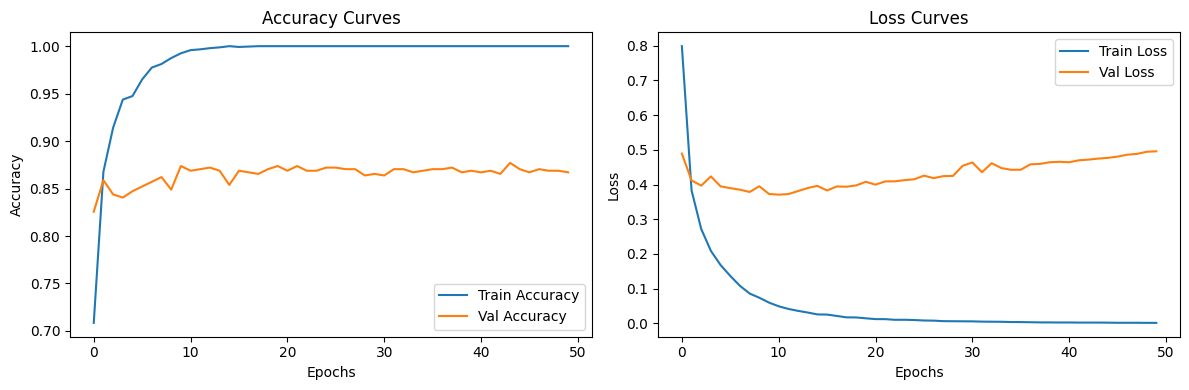

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step
Confusion Matrix:
 [[77  1  1  0  0  9]
 [ 0 94  0  1  0  0]
 [ 0  0 92 14  5  0]
 [ 0  0 17 85  3  0]
 [ 3  0  6  7 86  0]
 [10  1  0  2  0 88]]


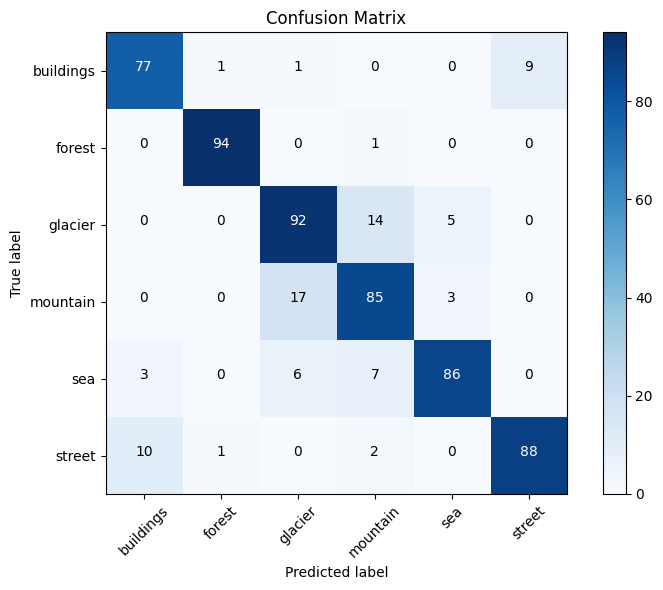

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.88      0.87        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.83      0.81       111
    mountain       0.78      0.81      0.79       105
         sea       0.91      0.84      0.88       102
      street       0.91      0.87      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



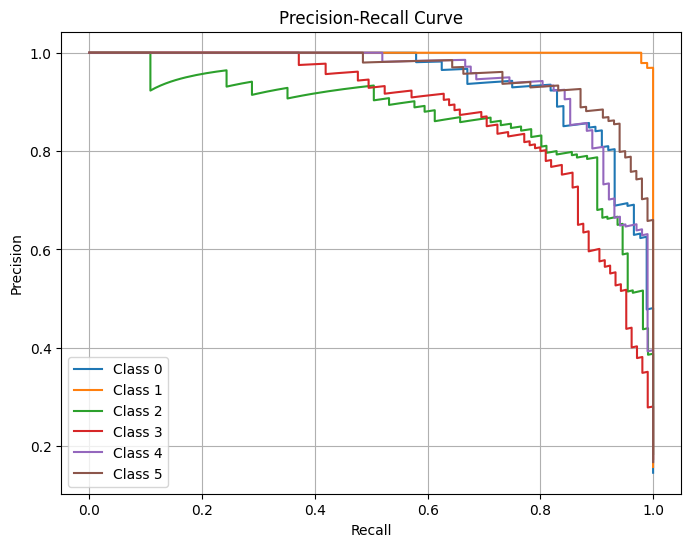

Training with Block 3 layers up to block3_conv2 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.8771 - val_loss: 0.5126
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8704 - val_loss: 0.5199
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8721 - val_loss: 0.5358
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.8522 - val_loss: 0.5985
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.8588 - val_loss: 0.5468
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8671 - val_loss: 0.5571
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 6.5877e-04 - val_accuracy: 0.8688 - val_loss: 0.5721
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━

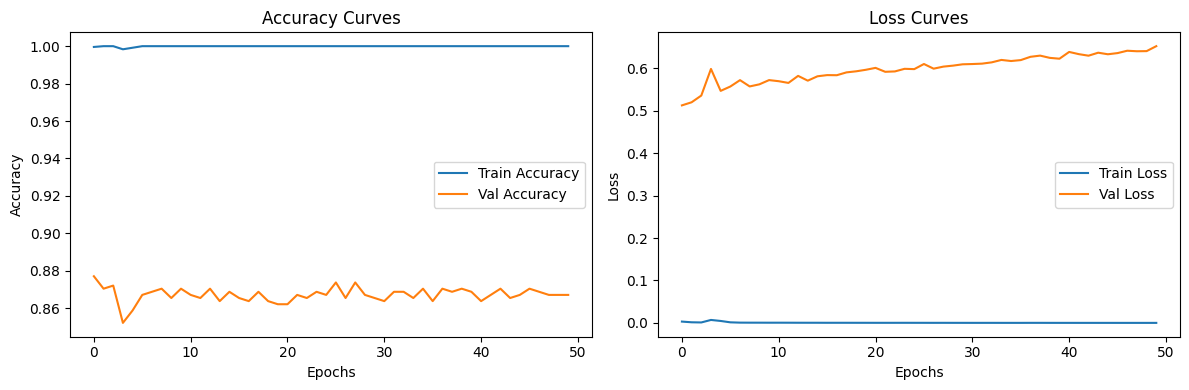

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step
Confusion Matrix:
 [[80  1  0  0  0  7]
 [ 0 94  0  1  0  0]
 [ 0  0 94 12  5  0]
 [ 1  0 18 83  3  0]
 [ 3  0  7  7 85  0]
 [12  1  0  1  1 86]]


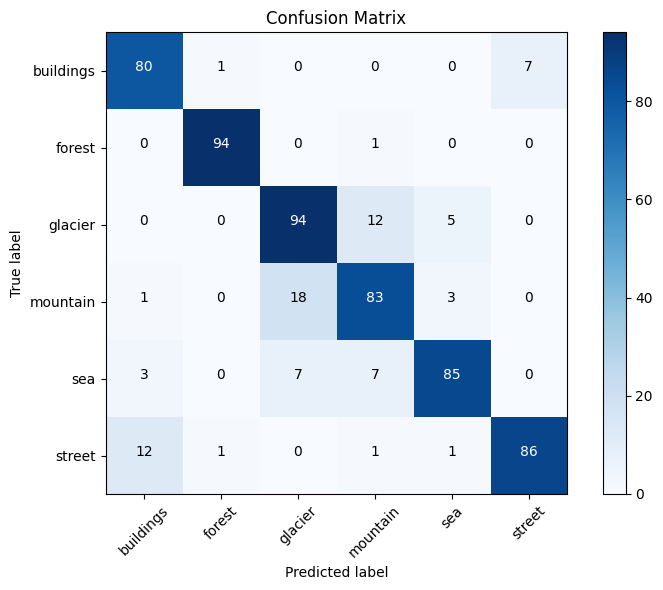

Classification Report:
               precision    recall  f1-score   support

   buildings       0.83      0.91      0.87        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.85      0.82       111
    mountain       0.80      0.79      0.79       105
         sea       0.90      0.83      0.87       102
      street       0.92      0.85      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



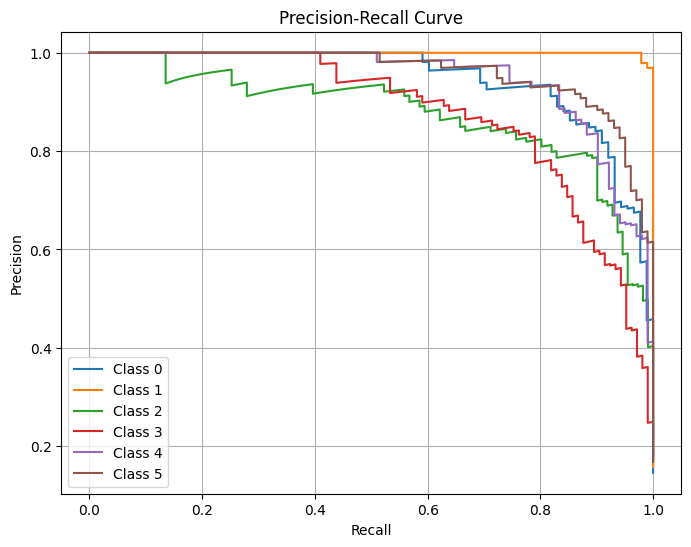

Training with Block 3 layers up to block3_conv3 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 1.0000 - loss: 1.1993e-04 - val_accuracy: 0.8721 - val_loss: 0.6700
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 1.4773e-04 - val_accuracy: 0.8721 - val_loss: 0.6824
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8721 - val_loss: 0.6866
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 5.9087e-04 - val_accuracy: 0.8704 - val_loss: 0.6974
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 4.4587e-04 - val_accuracy: 0.8654 - val_loss: 0.6675
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8721 - val_loss: 0.6746
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 1.1484e-04 - val_accuracy: 0.8738 - val_loss: 0.6865
Epoch 8/50
75/75 

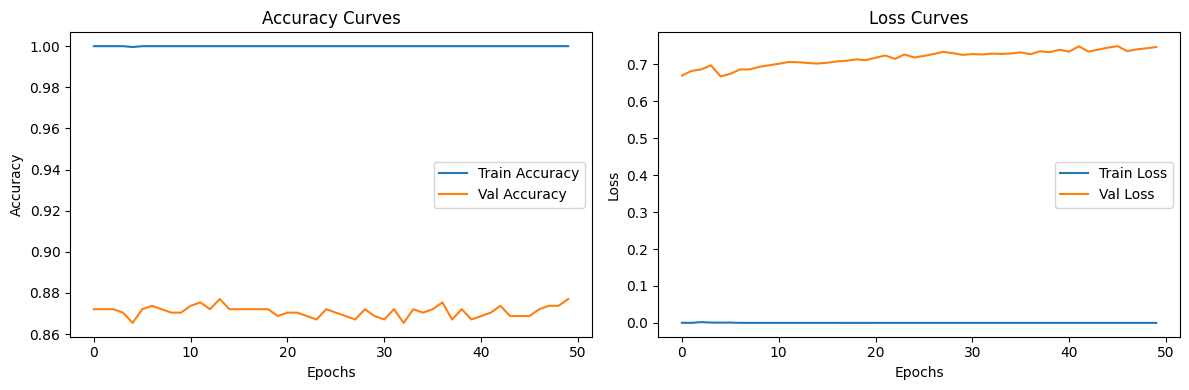

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[79  1  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 95 11  5  0]
 [ 1  0 16 84  4  0]
 [ 3  0  6  6 87  0]
 [ 9  1  0  1  1 89]]


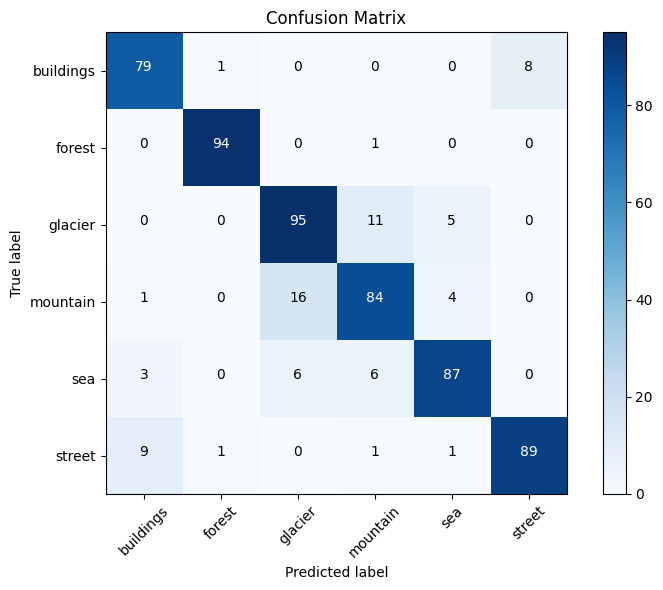

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.90      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.81      0.86      0.83       111
    mountain       0.82      0.80      0.81       105
         sea       0.90      0.85      0.87       102
      street       0.92      0.88      0.90       101

    accuracy                           0.88       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.88      0.88       602



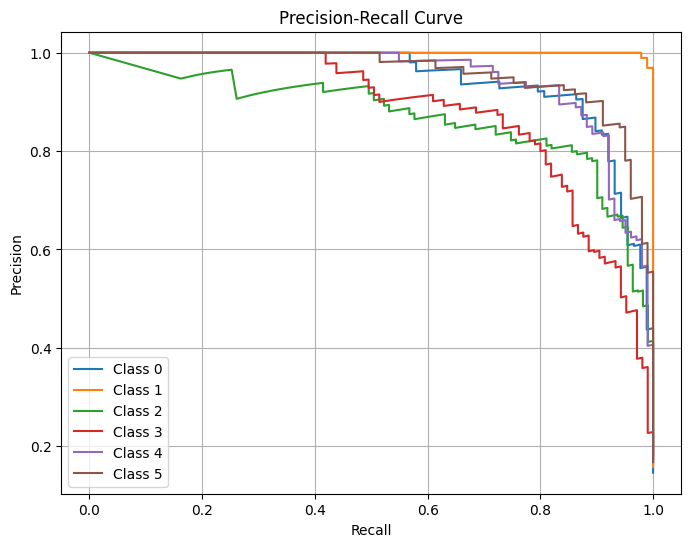

Training with Block 3 layers up to block3_pool unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 1.0000 - loss: 2.5817e-05 - val_accuracy: 0.8754 - val_loss: 0.7740
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 1.0000 - loss: 2.0255e-05 - val_accuracy: 0.8123 - val_loss: 1.1587
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8671 - val_loss: 0.7265
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 3.7407e-04 - val_accuracy: 0.8721 - val_loss: 0.8077
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 3.6262e-04 - val_accuracy: 0.8688 - val_loss: 0.7387
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 2.4065e-05 - val_accuracy: 0.8638 - val_loss: 0.7511
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 3.3662e-05 - val_accuracy: 0.8654 - val_loss: 0.7543
Epoch 8/50
75/

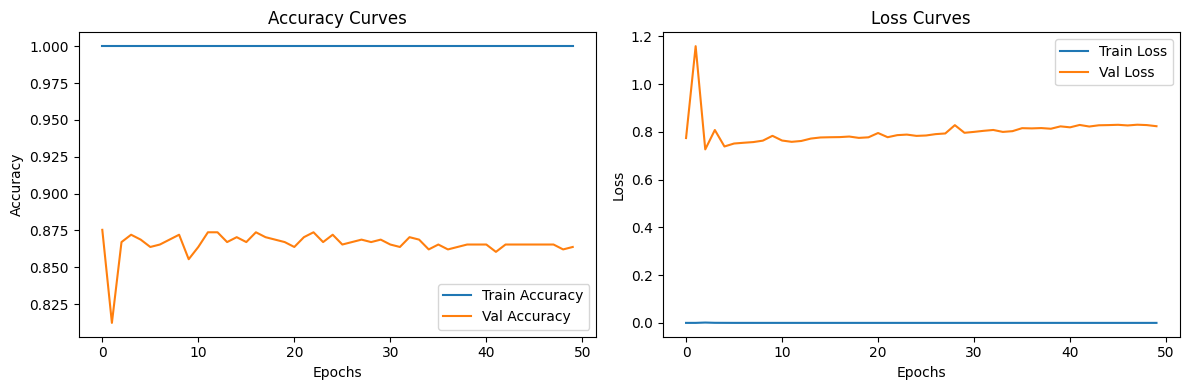

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[79  1  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  1 90 15  5  0]
 [ 1  0 17 83  4  0]
 [ 3  0  7  7 85  0]
 [ 9  1  0  2  0 89]]


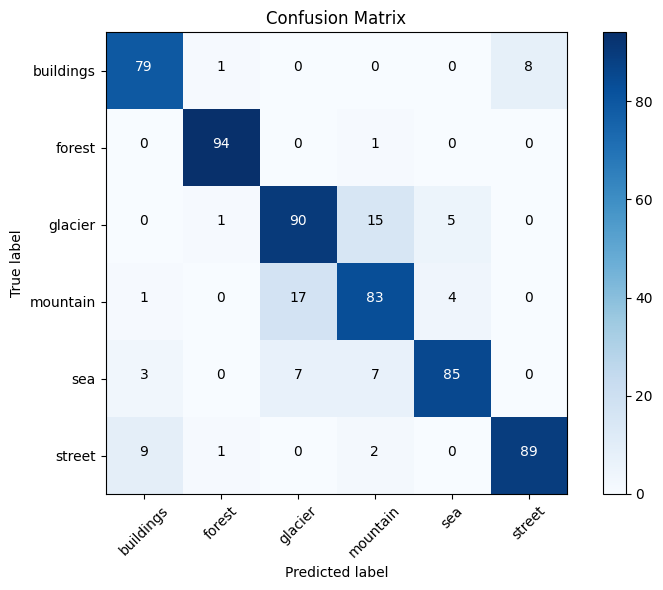

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.90      0.88        88
      forest       0.97      0.99      0.98        95
     glacier       0.79      0.81      0.80       111
    mountain       0.77      0.79      0.78       105
         sea       0.90      0.83      0.87       102
      street       0.92      0.88      0.90       101

    accuracy                           0.86       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.86      0.86       602



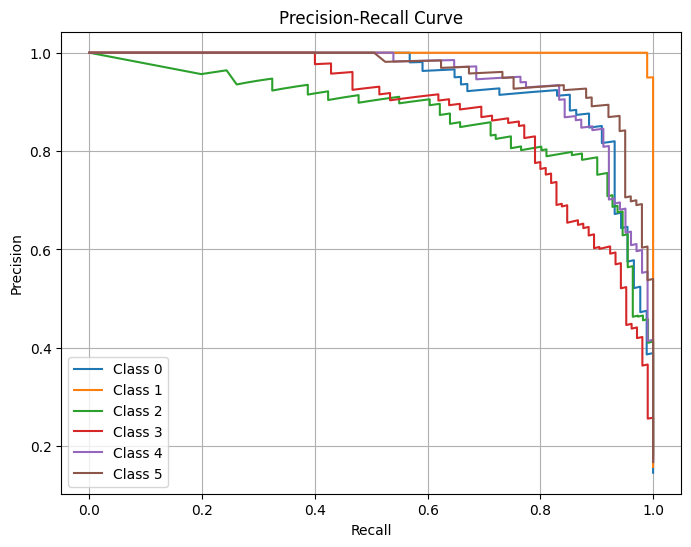

Testing with Dropout rate: 0.2
Training with Block 3 layers up to block3_conv1 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.5831 - loss: 1.0919 - val_accuracy: 0.8189 - val_loss: 0.4851
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.8578 - loss: 0.4052 - val_accuracy: 0.8455 - val_loss: 0.4036
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.8956 - loss: 0.2893 - val_accuracy: 0.8505 - val_loss: 0.3967
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9408 - loss: 0.2043 - val_accuracy: 0.8571 - val_loss: 0.3696
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9547 - loss: 0.1688 - val_accuracy: 0.8688 - val_loss: 0.3651
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9769 - loss: 0.1237 - val_accuracy: 0.8671 - val_loss: 0.3636
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9700 - loss: 0.1188 - val_accuracy: 0.8654 - val_loss: 0.3726
Epoch 

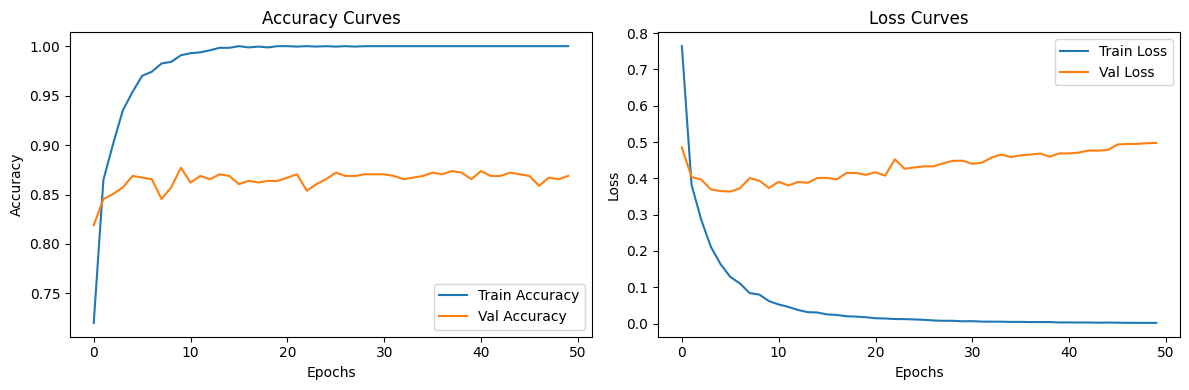

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step
Confusion Matrix:
 [[78  1  0  0  0  9]
 [ 0 94  0  1  0  0]
 [ 0  0 90 16  5  0]
 [ 0  0 16 86  3  0]
 [ 2  0  7  7 86  0]
 [ 9  1  0  1  1 89]]


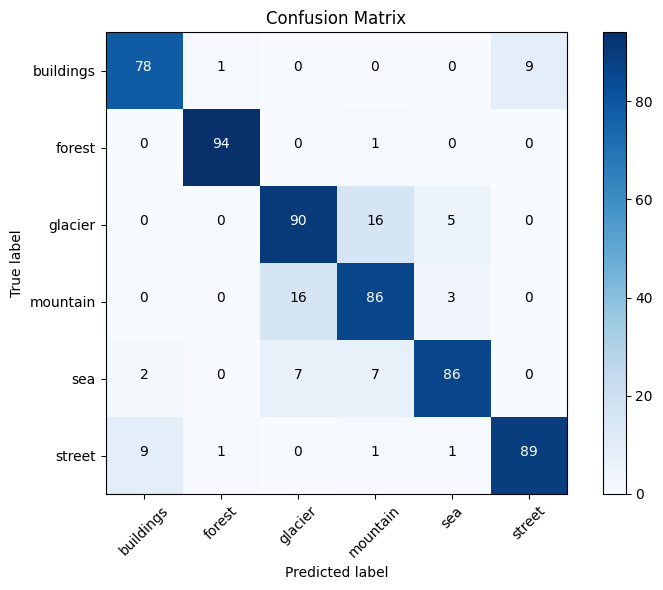

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.89      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.80      0.81      0.80       111
    mountain       0.77      0.82      0.80       105
         sea       0.91      0.84      0.87       102
      street       0.91      0.88      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



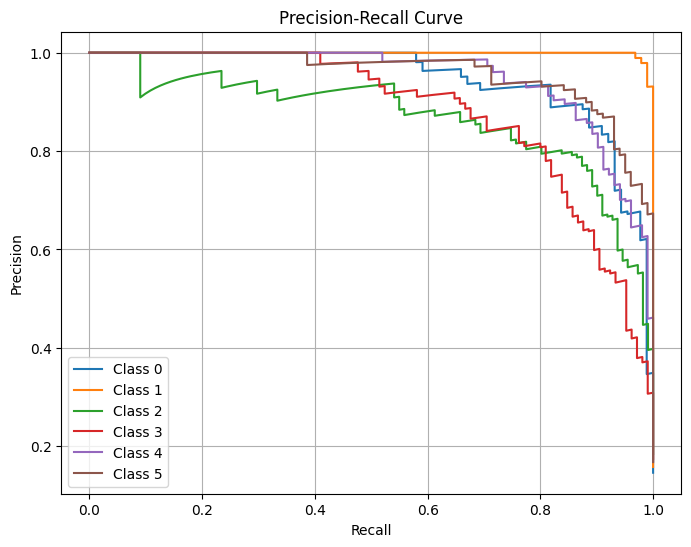

Training with Block 3 layers up to block3_conv2 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.8738 - val_loss: 0.5105
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8738 - val_loss: 0.5144
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8738 - val_loss: 0.5210
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8738 - val_loss: 0.5284
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8738 - val_loss: 0.5272
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.8522 - val_loss: 0.5692
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9978 - loss: 0.0116 - val_accuracy: 0.8355 - val_loss: 0.6327
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━

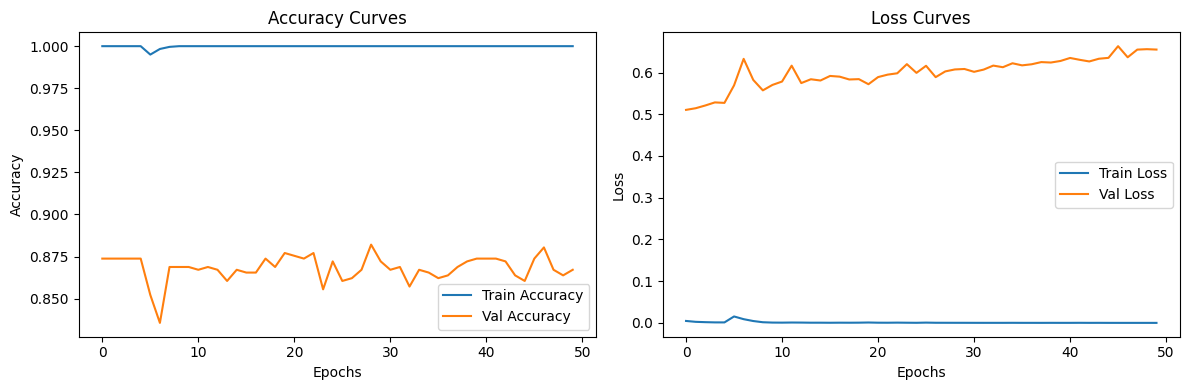

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step
Confusion Matrix:
 [[80  1  0  0  0  7]
 [ 0 93  0  1  0  1]
 [ 0  0 90 16  5  0]
 [ 0  0 15 86  4  0]
 [ 3  0  6  7 86  0]
 [11  1  0  1  1 87]]


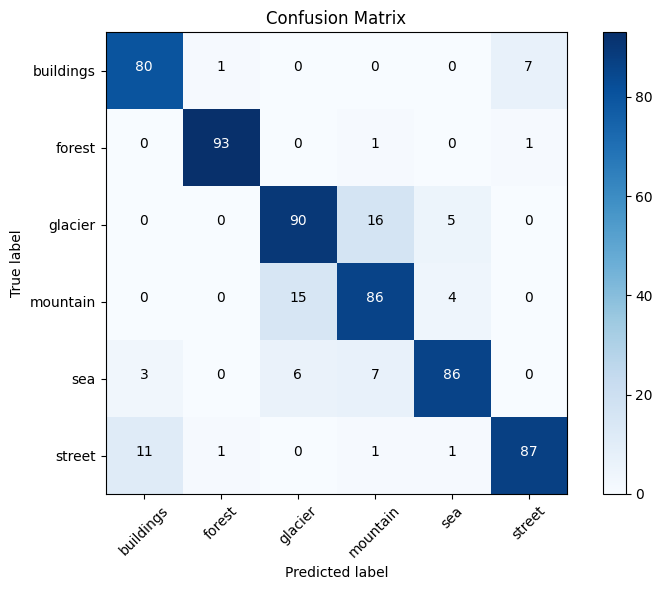

Classification Report:
               precision    recall  f1-score   support

   buildings       0.85      0.91      0.88        88
      forest       0.98      0.98      0.98        95
     glacier       0.81      0.81      0.81       111
    mountain       0.77      0.82      0.80       105
         sea       0.90      0.84      0.87       102
      street       0.92      0.86      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



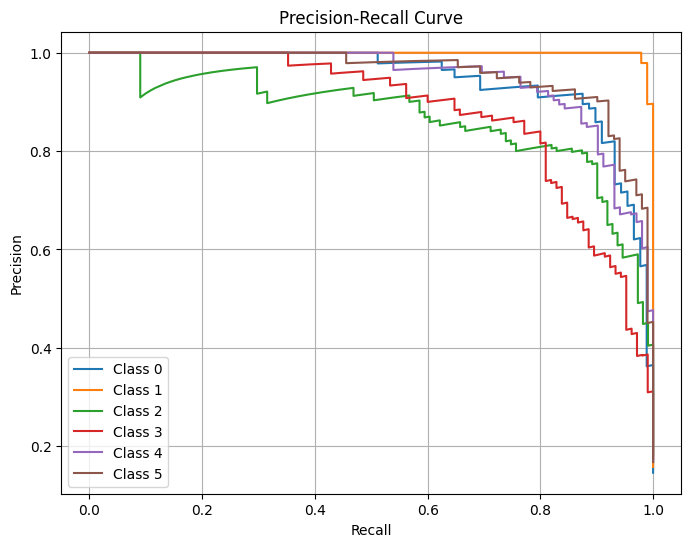

Training with Block 3 layers up to block3_conv3 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 1.0000 - loss: 3.8474e-04 - val_accuracy: 0.8804 - val_loss: 0.6728
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 1.0000 - loss: 4.8789e-04 - val_accuracy: 0.8538 - val_loss: 0.7671
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.8605 - val_loss: 0.6602
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.8738 - val_loss: 0.6862
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 5.2062e-04 - val_accuracy: 0.8621 - val_loss: 0.7108
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 1.3717e-04 - val_accuracy: 0.8638 - val_loss: 0.7066
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 1.5226e-04 - val_accuracy: 0.8704 - val_loss: 0.7060
Epoch 8/50
75/75 

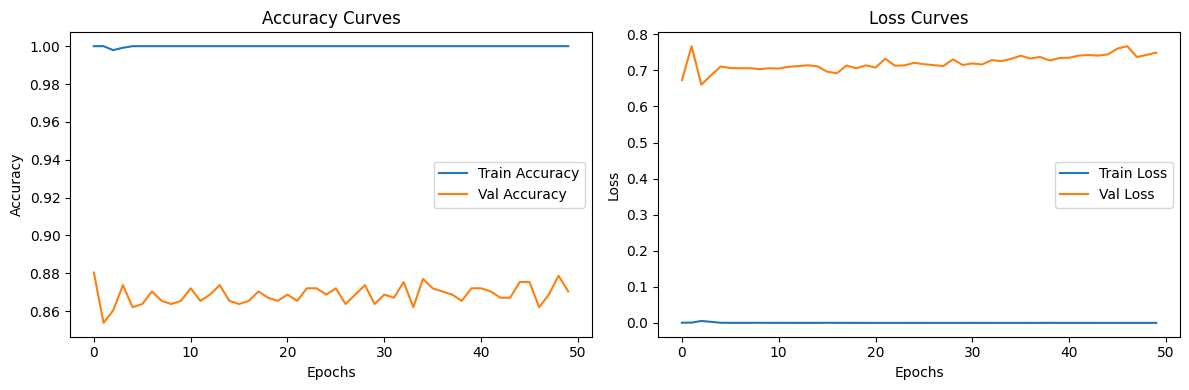

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[79  1  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 89 17  5  0]
 [ 0  0 16 86  3  0]
 [ 2  0  7  7 86  0]
 [ 8  1  0  1  1 90]]


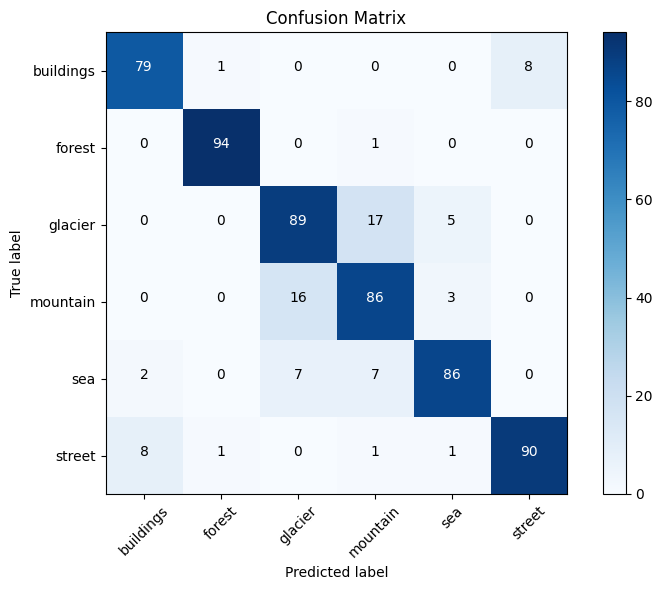

Classification Report:
               precision    recall  f1-score   support

   buildings       0.89      0.90      0.89        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.80      0.80       111
    mountain       0.77      0.82      0.79       105
         sea       0.91      0.84      0.87       102
      street       0.92      0.89      0.90       101

    accuracy                           0.87       602
   macro avg       0.88      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



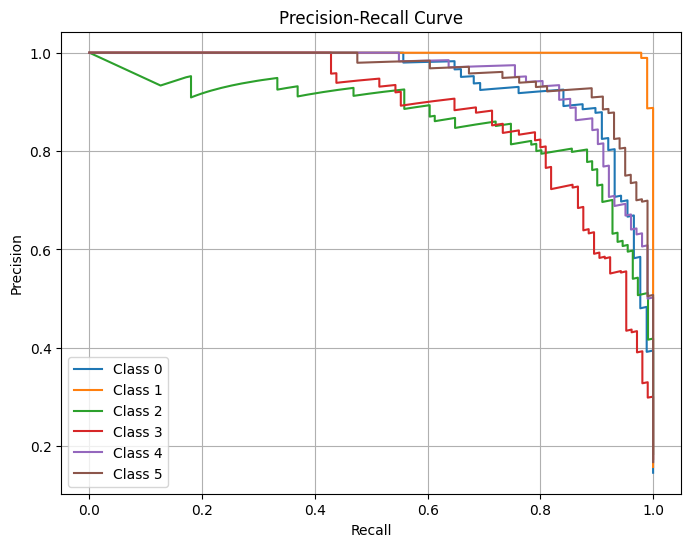

Training with Block 3 layers up to block3_pool unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 1.0000 - loss: 1.6631e-04 - val_accuracy: 0.8721 - val_loss: 0.7916
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 3.5744e-04 - val_accuracy: 0.8671 - val_loss: 0.7196
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8671 - val_loss: 0.7369
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 1.3263e-04 - val_accuracy: 0.8621 - val_loss: 0.7439
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 7.8721e-05 - val_accuracy: 0.8588 - val_loss: 0.7631
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 5.1087e-05 - val_accuracy: 0.8738 - val_loss: 0.7694
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 3.2325e-05 - val_accuracy: 0.8671 - val_loss: 0.7826
Epoch 8/50
75/

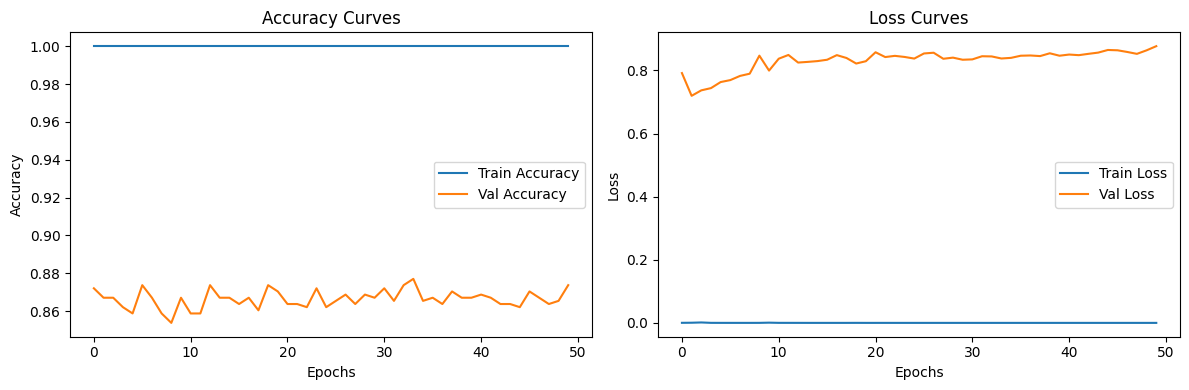

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[80  1  0  0  0  7]
 [ 0 94  0  1  0  0]
 [ 0  0 95 11  5  0]
 [ 0  0 17 84  4  0]
 [ 3  0  7  6 86  0]
 [11  1  0  1  1 87]]


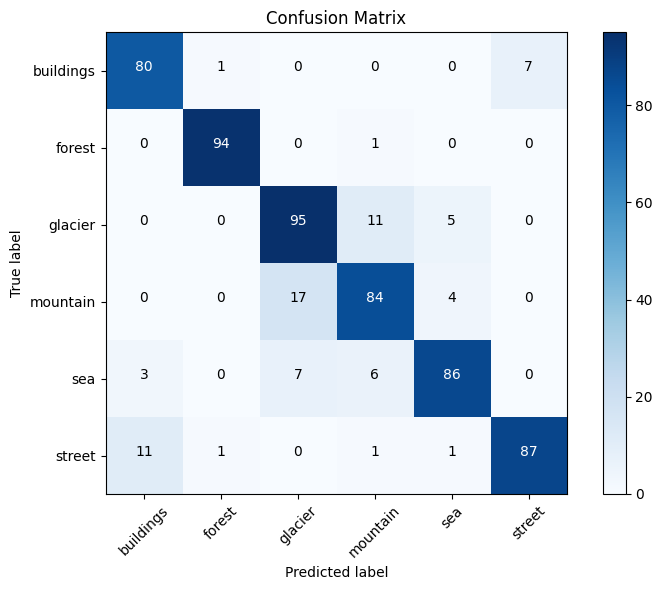

Classification Report:
               precision    recall  f1-score   support

   buildings       0.85      0.91      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.80      0.86      0.83       111
    mountain       0.82      0.80      0.81       105
         sea       0.90      0.84      0.87       102
      street       0.93      0.86      0.89       101

    accuracy                           0.87       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.87      0.87       602



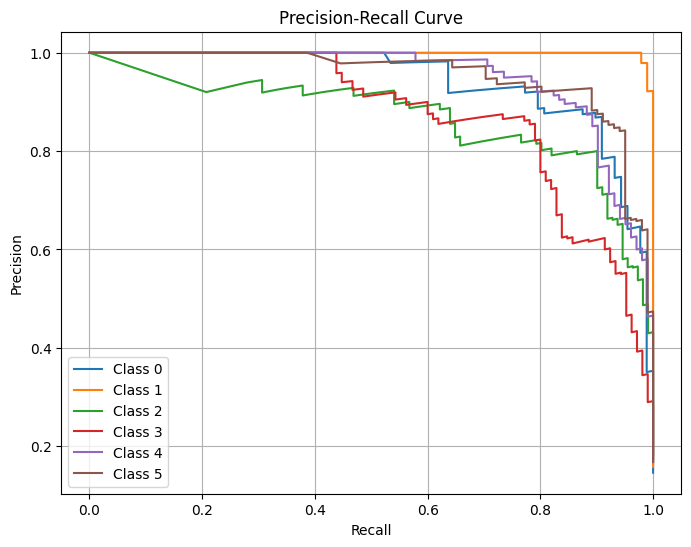

Testing with Dropout rate: 0.30000000000000004
Training with Block 3 layers up to block3_conv1 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.5789 - loss: 1.1159 - val_accuracy: 0.8156 - val_loss: 0.5019
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8522 - loss: 0.4411 - val_accuracy: 0.8505 - val_loss: 0.4159
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.8940 - loss: 0.3213 - val_accuracy: 0.8621 - val_loss: 0.3779
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.9182 - loss: 0.2524 - val_accuracy: 0.8322 - val_loss: 0.4428
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9383 - loss: 0.2096 - val_accuracy: 0.8571 - val_loss: 0.3847
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9474 - loss: 0.1770 - val_accuracy: 0.8306 - val_loss: 0.4479
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9521 - loss: 0.1688 - val_accuracy: 0.8721 - val_los

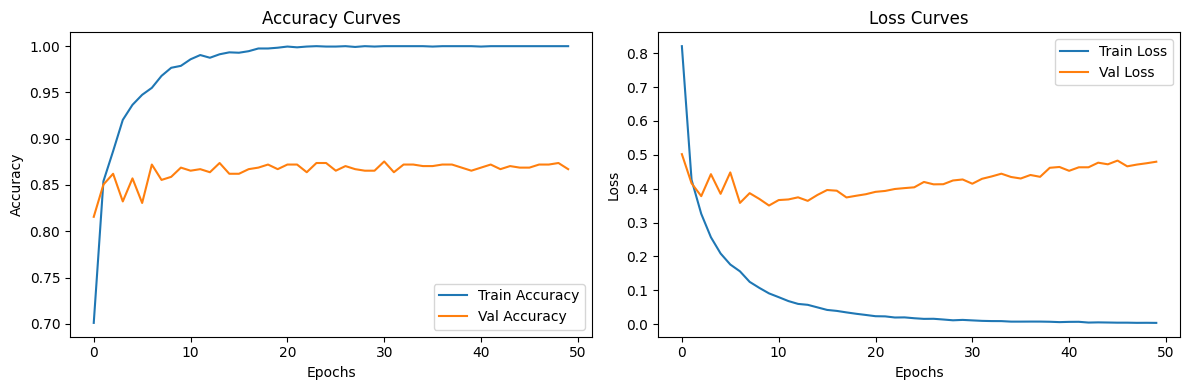

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[78  1  0  0  0  9]
 [ 0 94  0  1  0  0]
 [ 0  0 93 13  5  0]
 [ 0  0 19 83  3  0]
 [ 3  0  6  7 86  0]
 [10  1  0  1  1 88]]


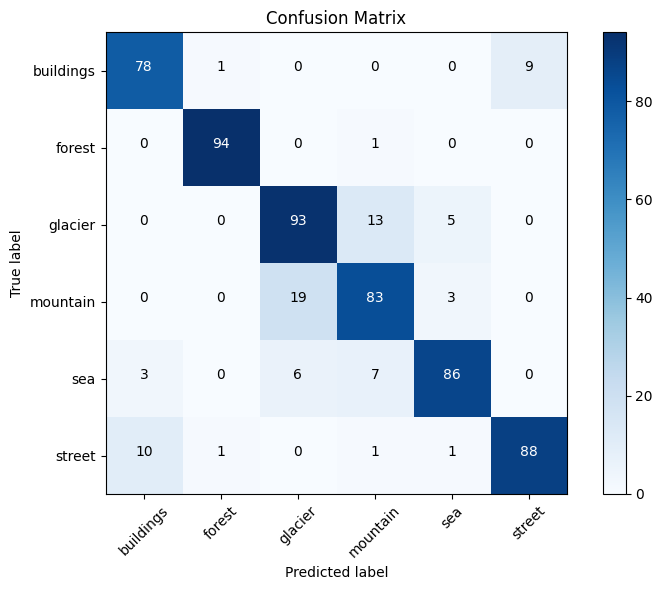

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.89      0.87        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.84      0.81       111
    mountain       0.79      0.79      0.79       105
         sea       0.91      0.84      0.87       102
      street       0.91      0.87      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



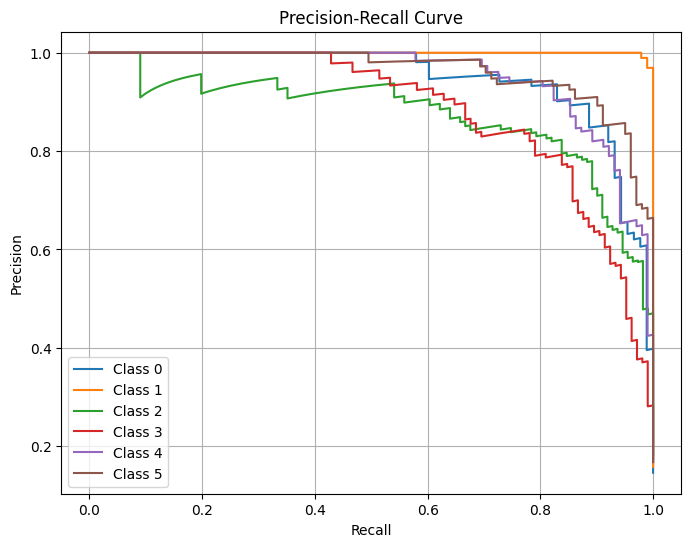

Training with Block 3 layers up to block3_conv2 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.8704 - val_loss: 0.5063
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.9999 - loss: 0.0033 - val_accuracy: 0.8638 - val_loss: 0.5688
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.9984 - loss: 0.0118 - val_accuracy: 0.8704 - val_loss: 0.5148
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8771 - val_loss: 0.5160
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8654 - val_loss: 0.5471
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8704 - val_loss: 0.5257
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.8638 - val_loss: 0.5601
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━

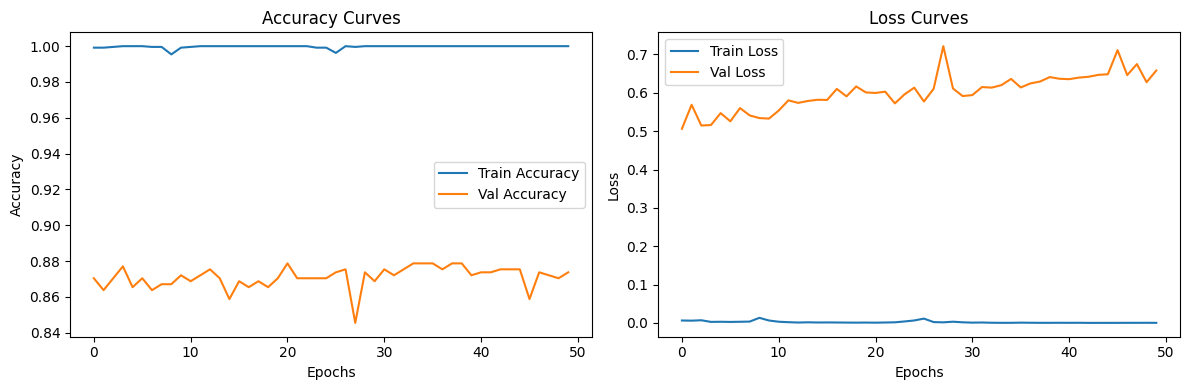

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step
Confusion Matrix:
 [[79  1  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 90 17  4  0]
 [ 0  0 14 88  3  0]
 [ 3  0  6  7 86  0]
 [ 9  1  0  2  0 89]]


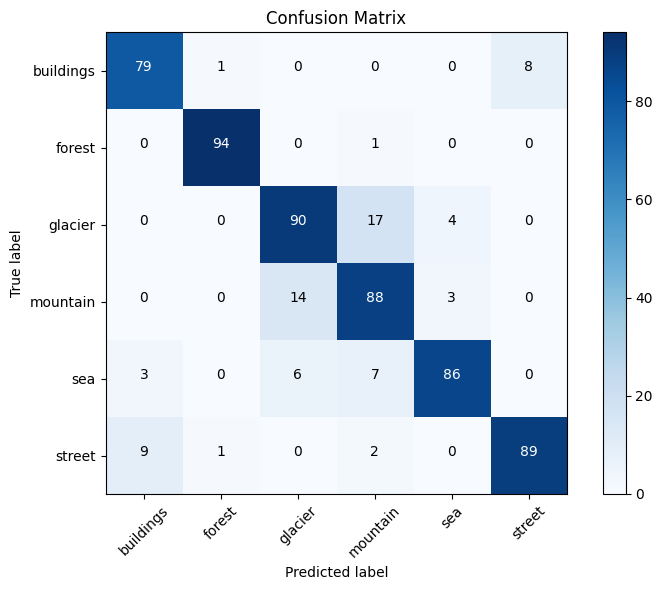

Classification Report:
               precision    recall  f1-score   support

   buildings       0.87      0.90      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.82      0.81      0.81       111
    mountain       0.77      0.84      0.80       105
         sea       0.92      0.84      0.88       102
      street       0.92      0.88      0.90       101

    accuracy                           0.87       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.87      0.87       602



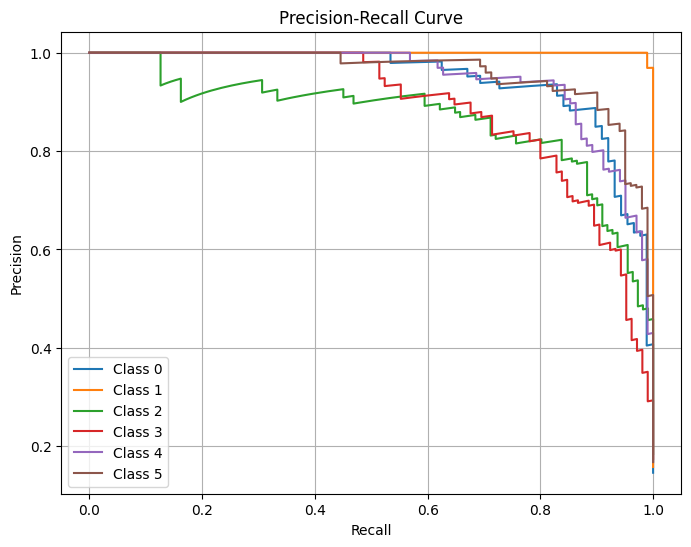

Training with Block 3 layers up to block3_conv3 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9990 - loss: 0.0016 - val_accuracy: 0.8688 - val_loss: 0.6996
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9996 - loss: 9.0386e-04 - val_accuracy: 0.8721 - val_loss: 0.6697
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8638 - val_loss: 0.6789
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9986 - loss: 0.0025 - val_accuracy: 0.8671 - val_loss: 0.7396
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 7.8640e-04 - val_accuracy: 0.8721 - val_loss: 0.6852
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9960 - loss: 0.0113 - val_accuracy: 0.8688 - val_loss: 0.7152
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.8721 - val_loss: 0.6920
Epoch 8/50
75/75 ━━━━━━━━━━━━

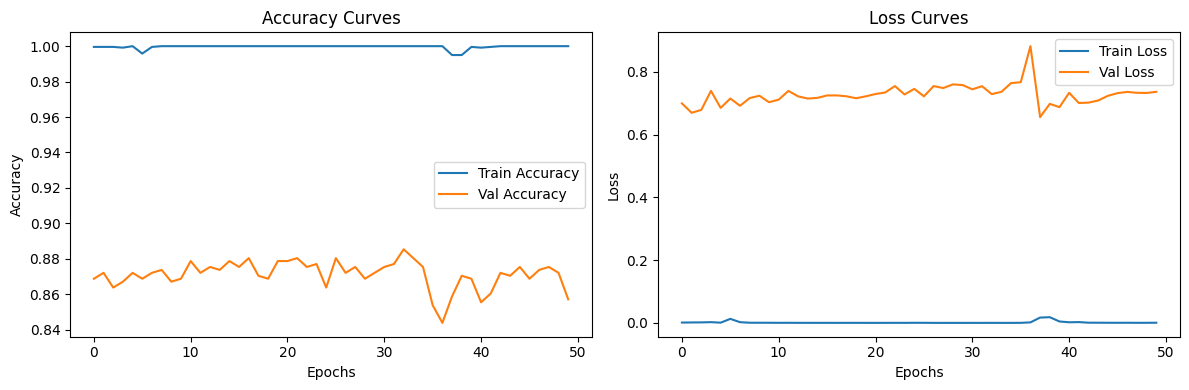

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step
Confusion Matrix:
 [[80  1  0  0  0  7]
 [ 0 94  0  1  0  0]
 [ 0  0 82 24  5  0]
 [ 0  0 16 87  2  0]
 [ 3  0  6  8 85  0]
 [10  1  0  2  0 88]]


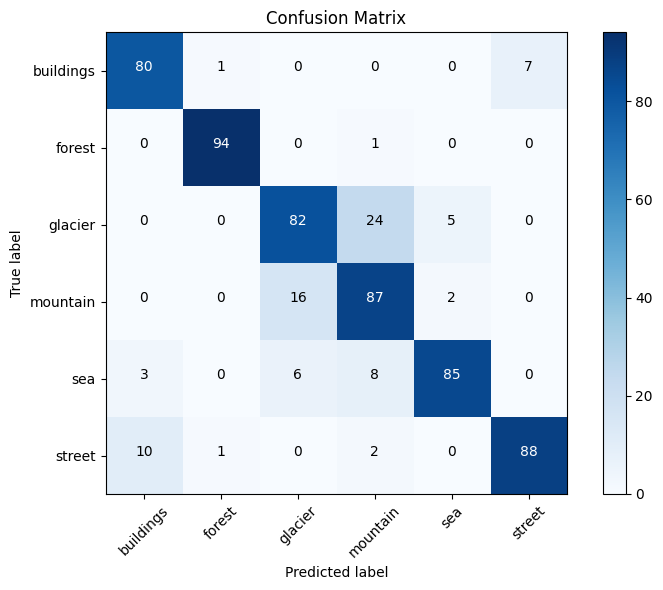

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.91      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.74      0.76       111
    mountain       0.71      0.83      0.77       105
         sea       0.92      0.83      0.88       102
      street       0.93      0.87      0.90       101

    accuracy                           0.86       602
   macro avg       0.87      0.86      0.86       602
weighted avg       0.86      0.86      0.86       602



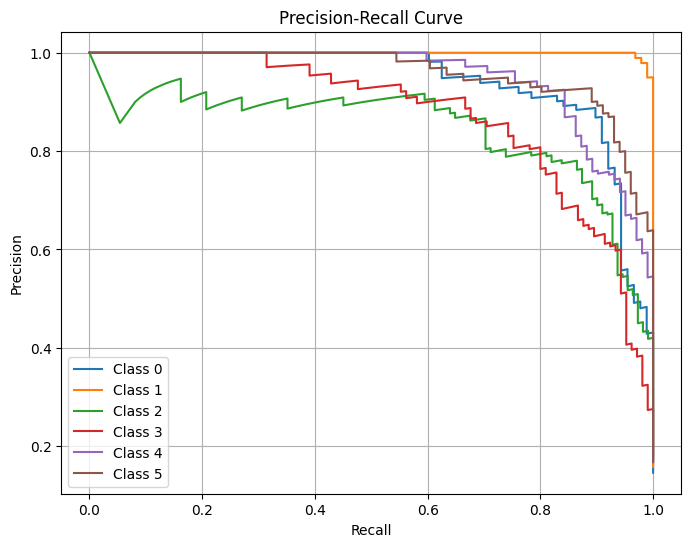

Training with Block 3 layers up to block3_pool unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.9998 - loss: 9.4498e-04 - val_accuracy: 0.8654 - val_loss: 0.7492
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.9999 - loss: 7.1152e-04 - val_accuracy: 0.8621 - val_loss: 0.8115
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8704 - val_loss: 0.7815
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 8.6902e-04 - val_accuracy: 0.8804 - val_loss: 0.8090
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 5.6126e-04 - val_accuracy: 0.8771 - val_loss: 0.8103
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 4.6921e-04 - val_accuracy: 0.8771 - val_loss: 0.8387
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 3.7980e-04 - val_accuracy: 0.8488 - val_loss: 0.7937
Epoch 8/50
75/

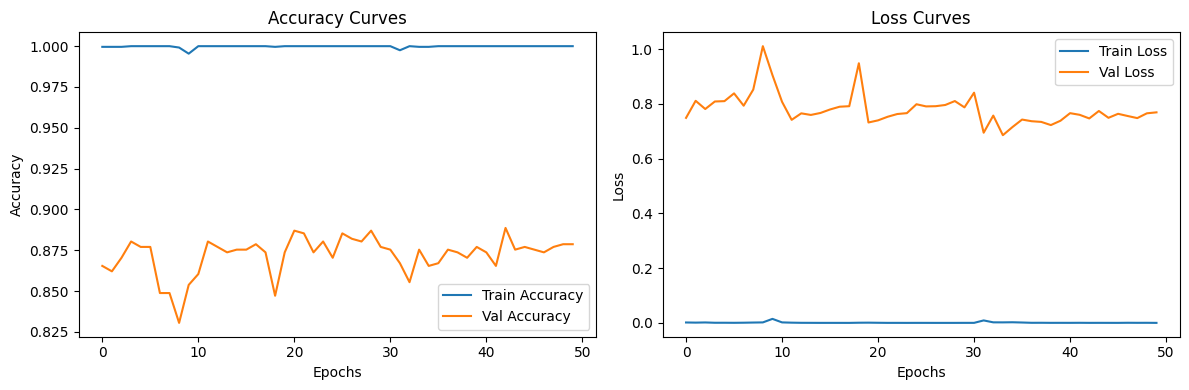

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step
Confusion Matrix:
 [[80  0  0  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 93 14  4  0]
 [ 0  0 13 85  7  0]
 [ 3  0  5  7 87  0]
 [ 8  1  0  1  1 90]]


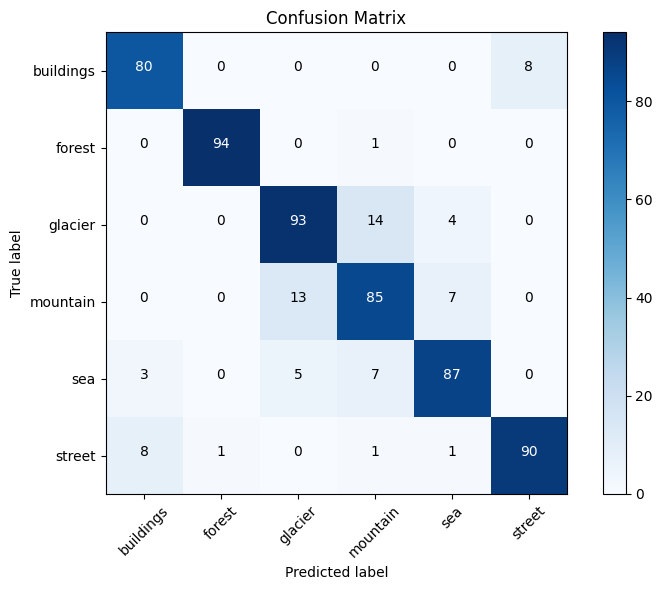

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.91      0.89        88
      forest       0.99      0.99      0.99        95
     glacier       0.84      0.84      0.84       111
    mountain       0.79      0.81      0.80       105
         sea       0.88      0.85      0.87       102
      street       0.92      0.89      0.90       101

    accuracy                           0.88       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.88      0.88       602



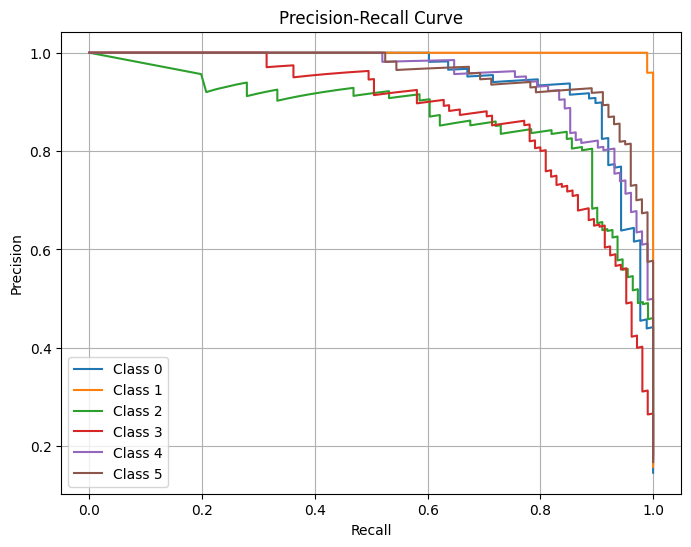

Testing with Dropout rate: 0.4
Training with Block 3 layers up to block3_conv1 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.5612 - loss: 1.1672 - val_accuracy: 0.8256 - val_loss: 0.5133
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8267 - loss: 0.4892 - val_accuracy: 0.8455 - val_loss: 0.4504
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.8532 - loss: 0.4024 - val_accuracy: 0.8372 - val_loss: 0.4331
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9025 - loss: 0.2907 - val_accuracy: 0.8605 - val_loss: 0.4017
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9170 - loss: 0.2431 - val_accuracy: 0.8638 - val_loss: 0.3927
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9331 - loss: 0.2134 - val_accuracy: 0.8721 - val_loss: 0.3620
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9531 - loss: 0.1755 - val_accuracy: 0.8754 - val_loss: 0.3722
Epoch 

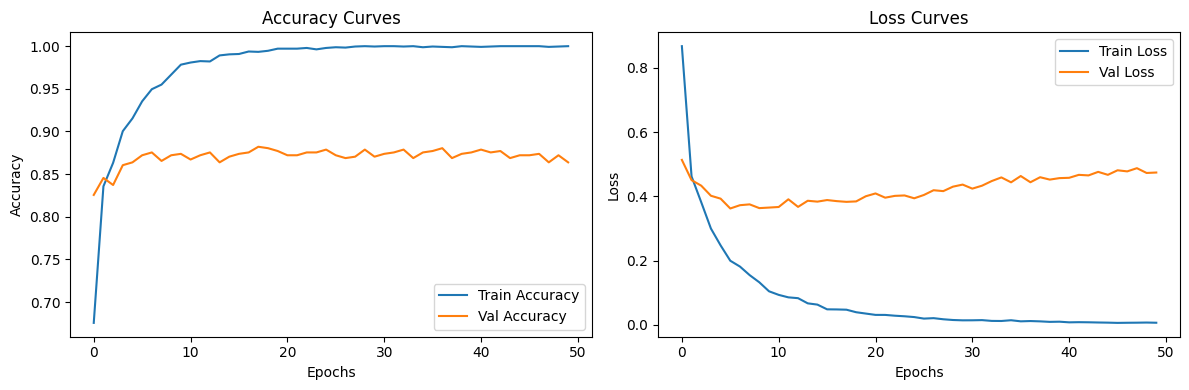

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[78  1  0  0  0  9]
 [ 0 93  0  1  1  0]
 [ 0  0 86 19  6  0]
 [ 0  0 12 86  7  0]
 [ 2  0  2  8 90  0]
 [11  1  0  0  2 87]]


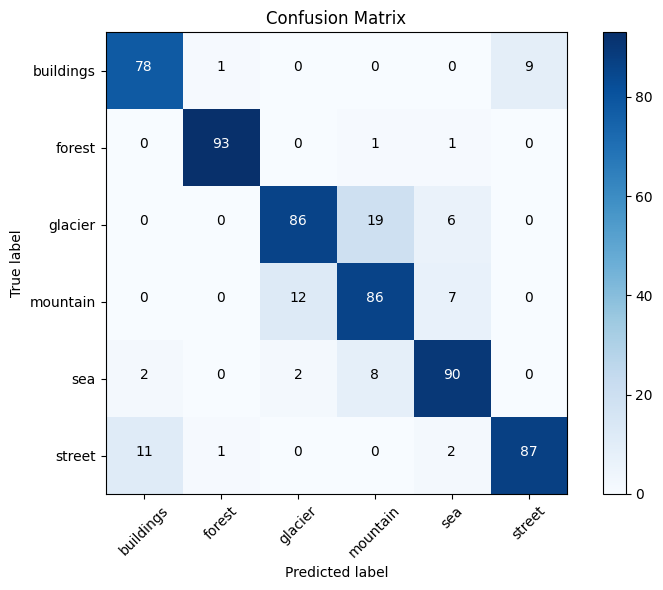

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.89      0.87        88
      forest       0.98      0.98      0.98        95
     glacier       0.86      0.77      0.82       111
    mountain       0.75      0.82      0.79       105
         sea       0.85      0.88      0.87       102
      street       0.91      0.86      0.88       101

    accuracy                           0.86       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.86      0.86       602



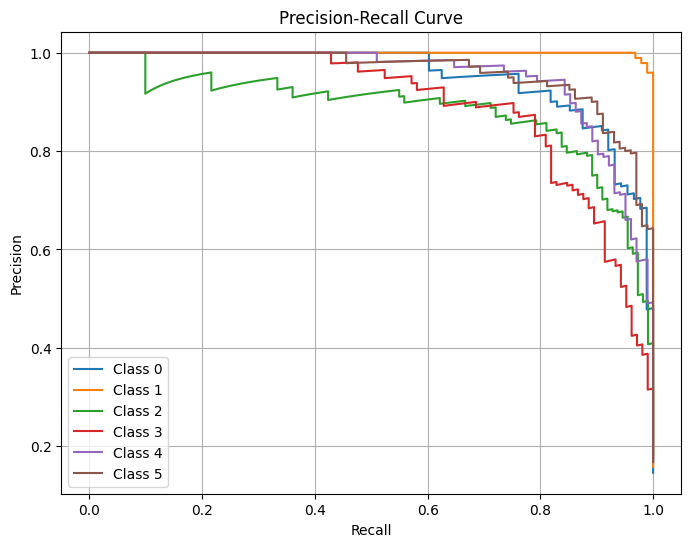

Training with Block 3 layers up to block3_conv2 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9987 - loss: 0.0082 - val_accuracy: 0.8771 - val_loss: 0.4706
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9994 - loss: 0.0073 - val_accuracy: 0.8754 - val_loss: 0.4907
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 0.8738 - val_loss: 0.4880
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.9995 - loss: 0.0079 - val_accuracy: 0.8721 - val_loss: 0.5188
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.8721 - val_loss: 0.5080
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8704 - val_loss: 0.5382
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8754 - val_loss: 0.5276
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━

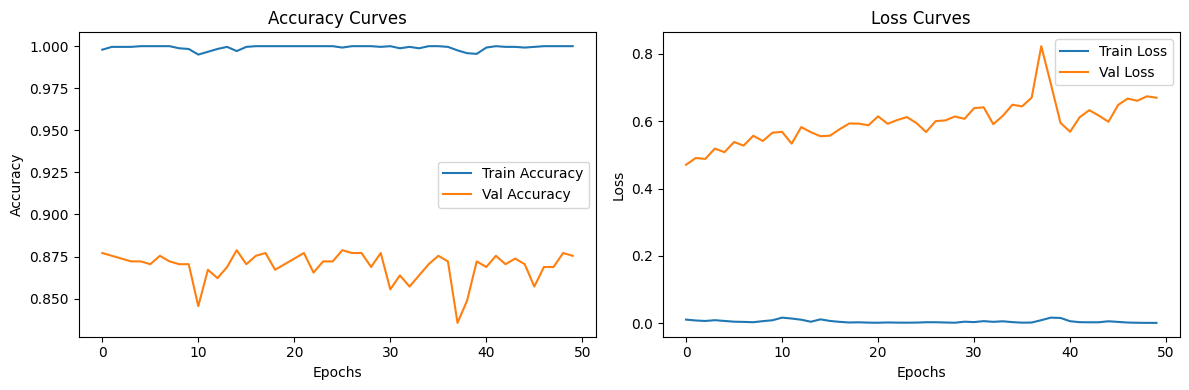

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[76  1  0  0  1 10]
 [ 0 94  0  1  0  0]
 [ 0  0 92 14  5  0]
 [ 0  0 16 86  3  0]
 [ 2  0  6  7 87  0]
 [ 6  1  0  1  1 92]]


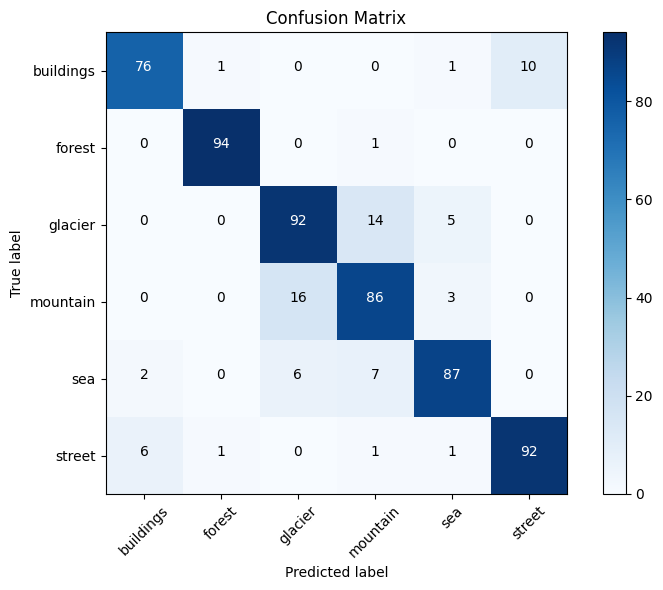

Classification Report:
               precision    recall  f1-score   support

   buildings       0.90      0.86      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.81      0.83      0.82       111
    mountain       0.79      0.82      0.80       105
         sea       0.90      0.85      0.87       102
      street       0.90      0.91      0.91       101

    accuracy                           0.88       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.88      0.88       602



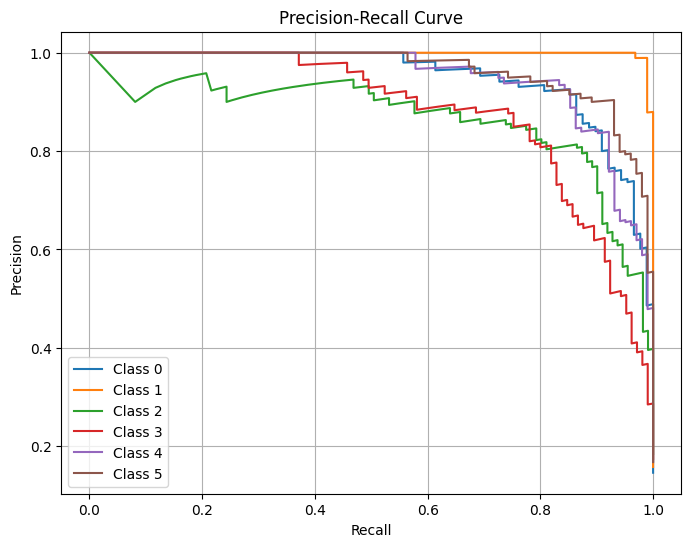

Training with Block 3 layers up to block3_conv3 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8621 - val_loss: 0.7234
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8472 - val_loss: 0.8636
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.9972 - loss: 0.0061 - val_accuracy: 0.8738 - val_loss: 0.7279
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8787 - val_loss: 0.7376
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 5.5488e-04 - val_accuracy: 0.8688 - val_loss: 0.7341
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9976 - loss: 0.0058 - val_accuracy: 0.8671 - val_loss: 0.6887
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 4.8291e-04 - val_accuracy: 0.8754 - val_loss: 0.7102
Epoch 8/50
75/75 ━━━━━━━━━━━━

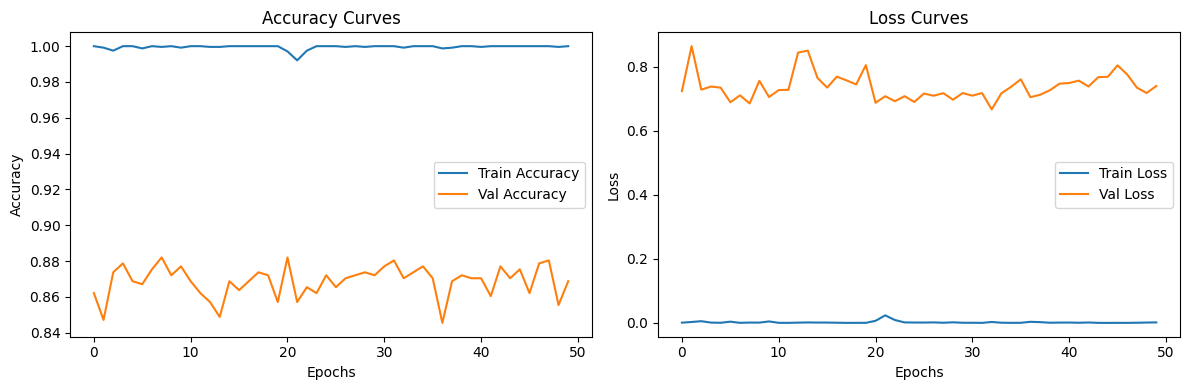

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
Confusion Matrix:
 [[78  1  0  0  1  8]
 [ 0 94  0  1  0  0]
 [ 0  0 93 13  5  0]
 [ 0  0 18 82  5  0]
 [ 3  0  7  5 87  0]
 [ 9  1  0  1  1 89]]


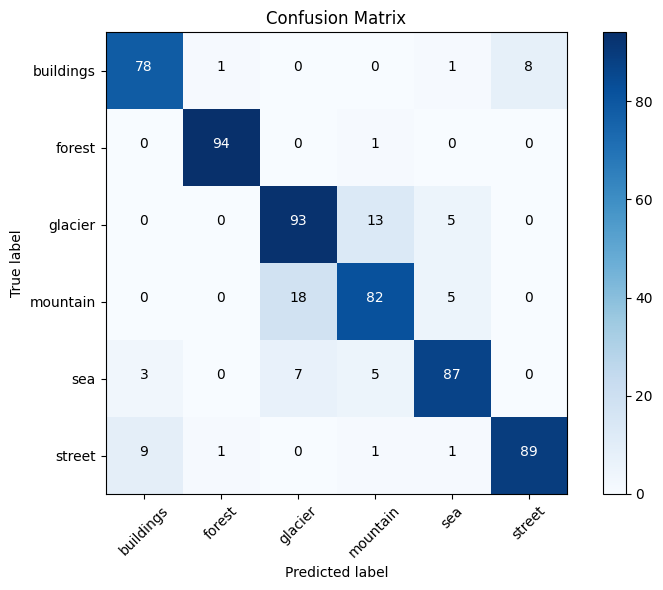

Classification Report:
               precision    recall  f1-score   support

   buildings       0.87      0.89      0.88        88
      forest       0.98      0.99      0.98        95
     glacier       0.79      0.84      0.81       111
    mountain       0.80      0.78      0.79       105
         sea       0.88      0.85      0.87       102
      street       0.92      0.88      0.90       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



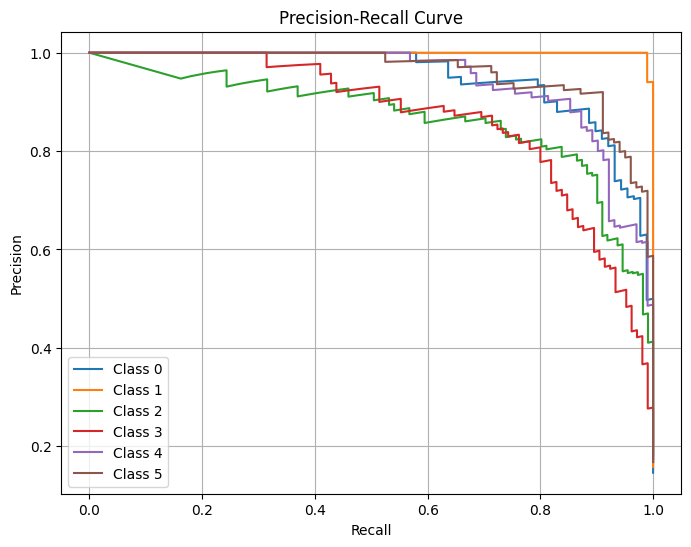

Training with Block 3 layers up to block3_pool unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9988 - loss: 0.0025 - val_accuracy: 0.8621 - val_loss: 0.8524
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8638 - val_loss: 0.8516
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 1.0000 - loss: 7.9590e-04 - val_accuracy: 0.8704 - val_loss: 0.8373
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 1.0000 - loss: 2.2636e-04 - val_accuracy: 0.8771 - val_loss: 0.8631
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 1.0000 - loss: 1.7650e-04 - val_accuracy: 0.8754 - val_loss: 0.8663
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 4.3873e-04 - val_accuracy: 0.8754 - val_loss: 0.8411
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 1.0000 - loss: 3.8783e-04 - val_accuracy: 0.8771 - val_loss: 0.8629
Epoch 8/50
75/75 ━

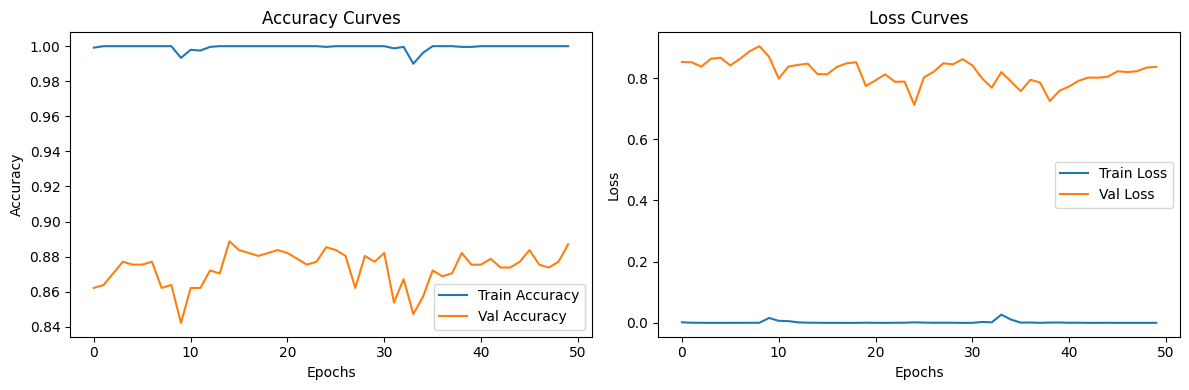

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step
Confusion Matrix:
 [[78  1  1  0  0  8]
 [ 0 94  0  1  0  0]
 [ 0  0 98  9  4  0]
 [ 0  0 17 85  3  0]
 [ 2  0  6  5 89  0]
 [ 8  1  0  1  1 90]]


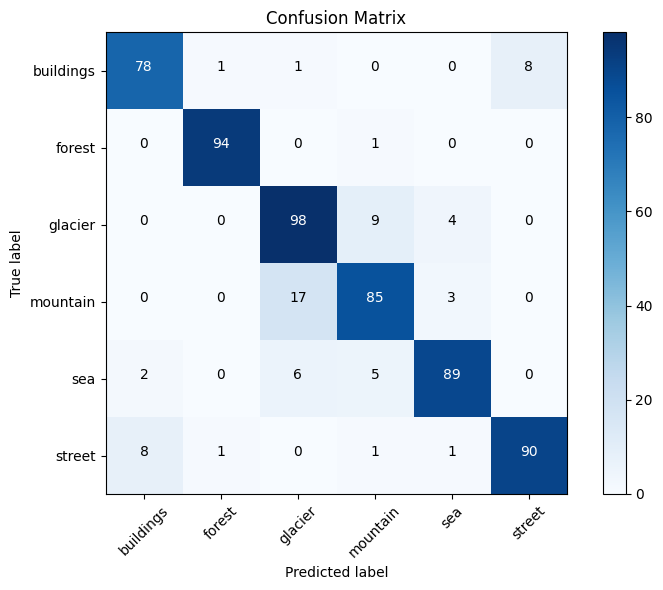

Classification Report:
               precision    recall  f1-score   support

   buildings       0.89      0.89      0.89        88
      forest       0.98      0.99      0.98        95
     glacier       0.80      0.88      0.84       111
    mountain       0.84      0.81      0.83       105
         sea       0.92      0.87      0.89       102
      street       0.92      0.89      0.90       101

    accuracy                           0.89       602
   macro avg       0.89      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



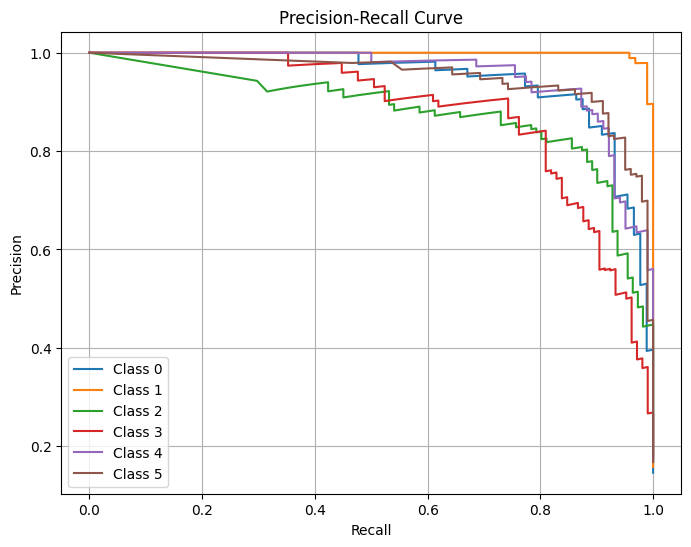

Testing with Dropout rate: 0.5
Training with Block 3 layers up to block3_conv1 unfrozen...
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.5074 - loss: 1.2668 - val_accuracy: 0.8306 - val_loss: 0.5331
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.7986 - loss: 0.5614 - val_accuracy: 0.8256 - val_loss: 0.4604
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.8610 - loss: 0.4163 - val_accuracy: 0.8538 - val_loss: 0.3993
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.8859 - loss: 0.3428 - val_accuracy: 0.8538 - val_loss: 0.3873
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9078 - loss: 0.2852 - val_accuracy: 0.8571 - val_loss: 0.3820
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9285 - loss: 0.2412 - val_accuracy: 0.8555 - val_loss: 0.3867
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9387 - loss: 0.2116 - val_accuracy: 0.8621 - val_loss: 0.3717
Epoch 

In [ ]:
run_test_harness()